In [36]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import nltk
from pprint import pprint
import os

## Load Data


In [37]:
# Start by defining the file relative path of this dataset. 
train_file_name = "../../Data/train.csv"
val_file_name = "../../Data/val.csv"
test_file_name = "../../Data/test.csv"
total_data_file_name = "../../Data/totaldata.csv"
    
processed_text_file_name = "../../Data/processed_text.csv"
data_with_features_file_name = "../../Data/data_with_features.csv"

# # Read in the data, use unicode_escape in order to successfully encode the data. 
df = pd.read_csv(total_data_file_name, encoding= 'unicode_escape')


# File path for full text files
FULL_TEXT_FOLDER = '../../Data/full_text/'


## Partition Article into Sections


In [38]:
import re

SECTION_KEYWORDS = ['abstract', 'introduction', 'method', 'result', 'discussion', 'reference']

section_keywords_selector = r'(?:%s)' % '|'.join(SECTION_KEYWORDS)

section_selector = (r'\s*?(%s)s?[^a-z]*' % section_keywords_selector) 

section_re = re.compile(section_selector, flags = re.S | re.I)

section_selector

'\\s*?((?:abstract|introduction|method|result|discussion|reference))s?[^a-z]*'

In [39]:
re1 = re.compile(r'-\s+')
re2 = re.compile(r'\s+')
def collapse_lines(text):
    text = re1.sub('', text)
    text = re2.sub(' ', text)
    return text


In [41]:
coreid2Article = {}

def process_article(core_id):
    if coreid2Article.get(core_id): return coreid2Article.get(core_id)
    coreid2Article[core_id] = 1

    full_text_file = '%s%s.txt' % (FULL_TEXT_FOLDER, core_id)
    with open(full_text_file, encoding='utf-8') as f:
        full_text = f.read()
    
    # Store the actual text of a section
    sec2Txt = {}
    
    sections = full_text.split('<<<')[1:]
    
    if not sections:
        print('Article %d not labeled!' % core_id)
        return 
    
    for section_text in sections:
        section_name_match_result = section_re.match(section_text)
        if section_name_match_result is None:
            print('Label error for article %d: %s' % (core_id, section_text[:10].replace('\n', ' ')))
            return
        
        section_name = section_name_match_result.group(1).lower()
        if section_name not in sec2Txt:
            sec2Txt[section_name] = ''
        sec2Txt[section_name] += section_text[section_name_match_result.span()[1] :]
    
    abstract = sec2Txt.get('abstract')
    if abstract:
        idx = abstract.find('>>>')
        if idx > -1:
            sec2Txt['abstract'] = abstract[:idx]
        else:
            print('Article %d doesn\'t have abstract closing' % core_id)
    else:
        print('Article %d doesn\'t have abstract, please double check to make sure' % core_id)
    

    # Remove all new line symbol and also dashes at the end of a line
    for sec in sec2Txt:
        sec2Txt[sec] = collapse_lines(sec2Txt[sec])
        
    sec2Data = {}
    for sec in sec2Txt:
        sec2Data[sec] = {}
        sec2Data[sec]['text'] = sec2Txt[sec]
        sec2Data[sec]['sent'] = nltk.tokenize.sent_tokenize(sec2Txt[sec])
        
    article = {}
    article['sections'] = sec2Data
    article['full_text'] = collapse_lines(full_text)

    coreid2Article[core_id] = article
    return article

# process_article(158977742)
# process_article(82173079)
# process_article(33604192)
# process_article(6503095)


In [42]:
for core_id in tqdm(df['core_id']):
    process_article(core_id)

  8%|▊         | 246/3000 [00:00<00:02, 1192.73it/s]

Article 81765890 not labeled!
Article 82864389 not labeled!
Article 81719097 not labeled!
Article 81091491 not labeled!
Article 81280802 not labeled!


 17%|█▋        | 511/3000 [00:00<00:02, 1200.34it/s]

Article 81867052 not labeled!
Article 82854584 not labeled!


 25%|██▍       | 745/3000 [00:00<00:02, 999.22it/s] 

Article 82260752 not labeled!
Article 82846198 not labeled!
Article 82403724 not labeled!
Article 82862405 not labeled!
Article 82173079 not labeled!
Article 82861940 not labeled!
Article 82862948 not labeled!


 34%|███▍      | 1020/3000 [00:00<00:01, 1152.96it/s]

Article 81857737 not labeled!
Article 81846122 not labeled!
Article 81768818 not labeled!
Article 81799992 not labeled!


 45%|████▌     | 1361/3000 [00:01<00:01, 1116.95it/s]

Article 82874991 not labeled!
Article 30319389 doesn't have abstract closing
Article 82888546 not labeled!
Article 82852800 not labeled!
Article 93144659 not labeled!
Article 82002670 not labeled!


 54%|█████▍    | 1616/3000 [00:01<00:01, 1105.45it/s]

Article 55846727 doesn't have abstract, please double check to make sure
Label error for article 20652885:  reuslts I


 62%|██████▏   | 1846/3000 [00:01<00:01, 1015.54it/s]

Article 82868732 not labeled!
Article 81192723 not labeled!
Article 82073833 not labeled!
Article 81288194 not labeled!


 66%|██████▌   | 1979/3000 [00:01<00:00, 1088.24it/s]

Article 9634246 not labeled!
Article 81605842 not labeled!
Article 81739181 not labeled!
Article 82854048 not labeled!
Article 1441362 doesn't have abstract closing


 81%|████████  | 2416/3000 [00:02<00:00, 1187.51it/s]

Article 82152711 not labeled!
Article 81800077 not labeled!
Article 9323912 not labeled!


 90%|████████▉ | 2697/3000 [00:02<00:00, 1182.19it/s]

Article 81905962 not labeled!
Article 81525093 not labeled!
Article 82858263 not labeled!
Article 81077179 not labeled!
Article 9633126 not labeled!
Article 82162478 not labeled!
Article 81084827 not labeled!


100%|██████████| 3000/3000 [00:02<00:00, 1092.09it/s]

Article 82867877 not labeled!
Article 1385821 doesn't have abstract closing
Article 82867364 not labeled!
Article 81153632 not labeled!


In [22]:
a = coreid2Article[158977742]
print(a["sections"]["reference"]["sent"])

['References 1.', 'Osborne, F., Motta, E.: Klink-2: Integrating Multiple Web Sources to Generate Semantic Topic Networks.', 'In: International Semantic Web Conference.', 'pp.', '408–424.', 'Springer (2015).', '2.', 'Osborne, F., Salatino, A., Birukou, A., Thanapalasingam, T., Motta, E.: Supporting Springer Nature Editors by means of Semantic Technologies.', 'In: International Semantic Web Conference.', 'Springer (2017).', '3.', 'Salatino, A.A., Thanapalasingam, T., Mannocci, A., Osborne, F., Motta, E.: The Computer Science Ontology : A Large-Scale Taxonomy of Research Areas.', 'In: International Semantic Web Conference 2018 , Monterey, CA (USA) (2018).', '4.', 'Osborne, F., Motta, E., Mulholland, P.: Exploring Scholarly Data with Rexplore.', 'In: International Semantic Web Conference pp.', '460–477.', 'Springer, Berlin, Heidelberg (2013).', '5.', 'Osborne, F., Salatino, A., Birukou, A., Motta, E.: Automatic Classification of Springer Nature Proceedings with Smart Topic Miner.', 'In: In

### Export all results to a file

In [55]:
if not os.path.exists(processed_text_file_name):
    output = []
    for core_id in coreid2Article:
        full_text = coreid2Article[core_id]['full_text']
        data = [core_id, full_text]
        columns = ['core_id', 'full_text']
        for section_title in coreid2Article[core_id]['sections']:
            columns.append(section_title)
            data.append(coreid2Article[core_id]['sections'][section_title]['text'])
        output.append(pd.DataFrame([data], columns=columns))
    pd.concat(output, ignore_index=True).to_csv(processed_text_file_name)

## Find Abstracts from Partitioned Articles

In [56]:
# process_article(158977742)
def find_abstract_percent(core_id):
    sections = process_article(core_id)['sections']
    abstract_len = len(sections['abstract']['text'])
    tot_len = sum(map(lambda x: len(sections[x]['text']), sections))
    return abstract_len / tot_len

df['abstract'] = [process_article(core_id)['sections']['abstract']['text'] for core_id in df['core_id']]
df['abstract_percent'] = [find_abstract_percent(core_id) for core_id in df['core_id']]
df['abstract_length'] = list(map(len, df['abstract']))

df['abstract_percent']

0       0.040380
1       0.040380
2       0.040380
3       0.040380
4       0.040380
          ...   
2995    0.020168
2996    0.020168
2997    0.020168
2998    0.020168
2999    0.041314
Name: abstract_percent, Length: 3000, dtype: float64

Unnamed: 0 unique_id  core_id  \
2286        2286    CC2287  4893515   

                                           citing_title citing_author  \
2286  No Bel-Robinson Tensor for Quadratic Curvature...       S Deser   

                                cited_title cited_author  \
2286  Gravitation and Relativity in General        Deser   

                                       citation_context  citation_class_label  \
2286  Subsequently, conserved B were found for arbit...                     0   

      citation_influence_label    set  \
2286                         0  train   

                                               abstract  abstract_percent  \
2286  We attempt to generalize the familiar covarian...          0.101535   

      abstract_length  
2286              959

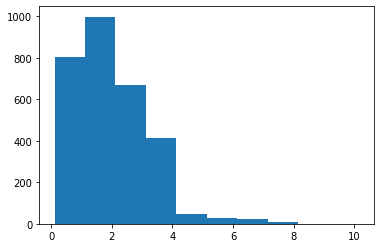

In [57]:
plt.hist(df['abstract_percent'] * 100)
df[(0.1 < df['abstract_percent']) & (df['abstract_percent'] < 0.2)]

In [58]:
df[df['abstract_length'] > 4000].drop_duplicates(subset=['core_id'])


Unnamed: 0 unique_id   core_id  \
601         601     CC602  82403724   

                                          citing_title citing_author  \
601  Life, hierarchy, and the thermodynamic machine...  Axel Kleidon   

                                           cited_title cited_author  \
601  Mep and planetary climates insights from a two...         Jupp   

                                      citation_context  citation_class_label  \
601  Since then, further work has shown that MEP yi...                     0   

     citation_influence_label  set  \
601                         0  val   

                                              abstract  abstract_percent  \
601  1. Life and the Earth system . . . . . . . . ....           0.03507   

     abstract_length  
601             4915

## Find Position of Citation Context in Article

In [59]:
idx = 1100

nonword_re = re.compile('[^A-Za-z]+')
def find_position_in_article(idx, debug = False):
    entry = df.iloc[idx]
    context = entry['citation_context']
    
    context_set = set(nonword_re.split(context.replace('#AUTHOR_TAG', '')))
    
    sections = process_article(entry['core_id'])['sections']
    
    # As in (sectionName, index)
    search_result = (None, -1)
    best_percentage = 0
    for section in sections:
        for idx, val in enumerate(sections[section]['sent']):
            percentage = len(set(nonword_re.split(val)).intersection(context_set)) / len(context_set)
            if best_percentage < percentage:
                best_percentage = percentage
                search_result = (section, idx)
        if percentage == 1:
            break
    
    if debug:
        print(context)
        print(sections[search_result[0]]['sent'][search_result[1]])
    assert(search_result[1] != -1)
    return search_result

# find_position_in_article(idx, True)

# df[['section', 'sent_idx']] = [find_position_in_article(idx) for idx in tqdm(range(len(df)))]

new_frame = pd.DataFrame([find_position_in_article(idx) for idx in tqdm(range(len(df)))], columns=['section', 'sent_idx'])

# [find_position_in_article(11, True), find_position_in_article(12, True)]

100%|██████████| 3000/3000 [00:15<00:00, 196.08it/s]


In [60]:
df[['section', 'sent_idx']] = new_frame

## Draw ROC

### Metric.py


In [61]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import roc_curve, auc, RocCurveDisplay, f1_score
sns.set_style("whitegrid")
sns.set_context("talk")

'''
API for plotting standardized metrics for reporting. Pretty simple stuff but just to keep us all
on the same page as well as to not waste time coding them up ourselves. 

NOTE: For all models, this takes in predicted scores, NOT just the classification. 
This means for sklearn models you need to call model.predict_probaba(X).
For pytorch models you need to pass in the full softmax output.
'''

def multiclass_metrics(y_true, y_pred, output_text=False, filepath="/metric_outputs/"):
    '''
    :param y_true: A (Nx1) vector with the true class prediction [0,1,2,3,4,5]
    :param y_pred: A (Nx6) matrix with the classifier scores for each class.
    :param output_text: a boolean if you want to output the f1, macrof1, and auc scores to a textfile
    :param filepath: the filepath to which the output text will go
    :return: nothing, just generates plots
    '''
    titles = ["Background", "Compares/Contrasts", "Extension", "Future", "Motivation", "Uses"]
    fpr = dict()
    tpr = dict()
    auc1 = dict()
    f1scores = []
    for i in range(6):
        tests = np.array(y_true == i, dtype="int")
        scores = np.array([y_pred[j][i] for j in range(len(y_pred))], dtype = np.float64)
        preds = np.array([np.argmax(y_pred[j]) == i for j in range(len(y_pred))], dtype="int")

        fpr[i], tpr[i], _ = roc_curve(tests, scores)
        auc1[i] = auc(fpr[i], tpr[i])
        f1scores.append(f1_score(tests, preds))
    macrof1 = np.mean(f1scores)
    if output_text:
        f = open(filepath+"multiclass.txt", "a")
        print("----------------", file=f)
        for i in range(6):
            print(titles[i] + " Roc-Auc: " + str(auc1[i]), file=f)
            print(titles[i] + " F1 Score: " + str(f1scores[i]), file=f)
        print("Macro F1 Score: " + str(macrof1), file=f)
        print("----------------", file=f)
        f.close()

    fig, axs = plt.subplots(2,3, figsize=(20,10))
    plt.subplots_adjust(hspace=0.5, wspace=0.5)

    for i in range(6):
        ax = axs.flat[i]
        ax.set_xlabel("False Positive Rate")
        ax.set_ylabel("True Positive Rate")
        ax.set_title(f"ROC for {titles[i]}")
        ax.plot(fpr[i], tpr[i], linestyle="--", marker=".", markersize=15, label=f"AUC: {auc1[i]}")
        ax.plot([0,1],[0,1], linestyle = "--", c = "k")
        ax.legend()
    plt.show()

def binary_metrics(y_true, y_pred, output_text=False, filepath="/metric_outputs/"):
    '''
    :param y_true: an (Nx1) vector of the true labels for each sample.
    :param y_pred: an (Nx1) vector of output probabilities for the POSITIVE class, which in our case
        is influential.
    :param output_text: a boolean if you want to output the f1, macrof1, and auc scores to a textfile
    :param filepath: the filepath to which the output text will go
    :return: nothing, just generates plots
    '''
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    f1 = f1_score(y_true, np.array([y_pred[j] >= 0.5 for j in range(len(y_pred))], dtype="int"))
    aucs = auc(fpr, tpr)
    if output_text:
        f = open(filepath+"binaryclass.txt", "a")
        print("----------------", file=f)
        print(f"ROC-AUC: {aucs}", file=f)
        print(f"F1 Score: {f1}", file=f)
        print("----------------", file=f)
        f.close()

    plt.figure(figsize=(10, 6))
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC for Influential vs Incidential")
    plt.plot(fpr, tpr, linestyle="--", marker=".", markersize=15,label=f"AUC: {aucs}")
    plt.plot([0, 1], [0, 1], linestyle="--", c="k")
    plt.legend()
    plt.show()

### Percent in Article


In [62]:
def find_percent_in_article(row):
    core_id, section, sent_idx = row[['core_id', 'section', 'sent_idx']]
    article = process_article(core_id)
    return (article['full_text'].index(article['sections'][section]['sent'][sent_idx]) 
            / len(article['full_text']))

df['percent_in_article'] = df.apply(find_percent_in_article, axis = 1)


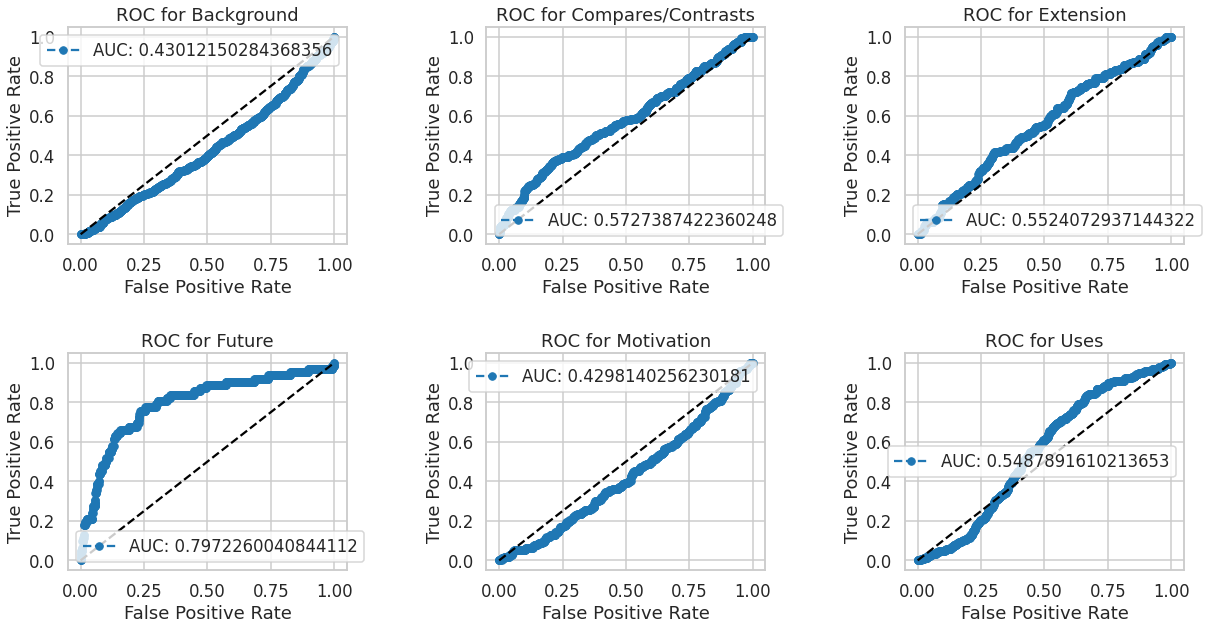

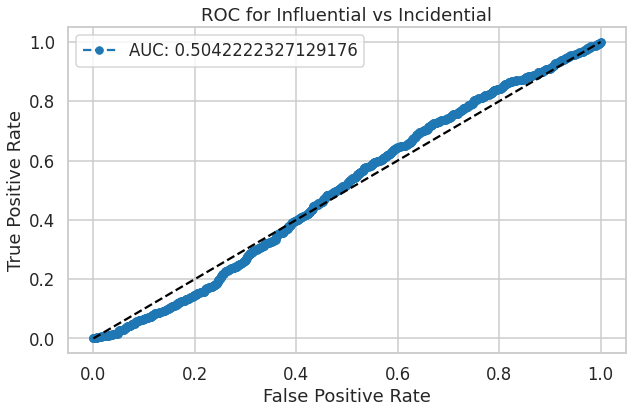

In [63]:
multiclass_metrics(df['citation_class_label'], np.repeat(df['percent_in_article'].to_numpy().reshape(-1, 1), 6, 1))
binary_metrics(df['citation_influence_label'], df['percent_in_article'])

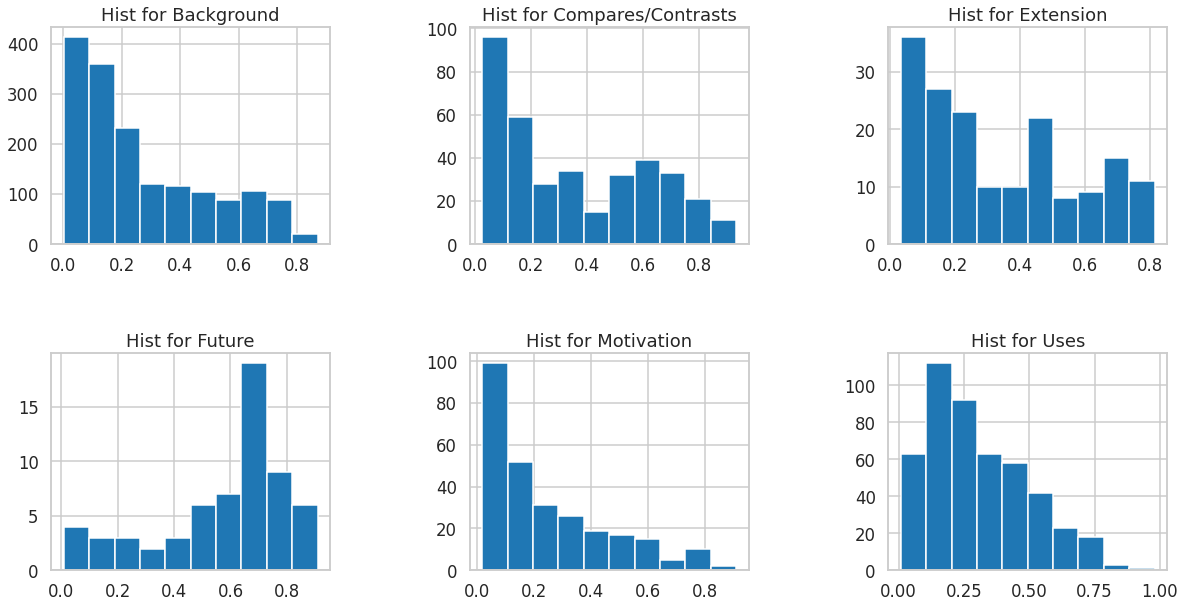

In [64]:
titles = ["Background", "Compares/Contrasts", "Extension", "Future", "Motivation", "Uses"]
fig, axs = plt.subplots(2,3, figsize=(20,10))
plt.subplots_adjust(hspace=0.5, wspace=0.5)

for i in range(6):
    ax = axs.flat[i]
#     ax.set_xlabel("False Positive Rate")
#     ax.set_ylabel("True Positive Rate")
    ax.set_title(f"Hist for {titles[i]}")
    ax.hist(df[df['citation_class_label'] == i]['percent_in_article'])
#     ax.plot([0,1],[0,1], linestyle = "--", c = "k")
#     ax.legend()


### Export features to file

In [81]:
if not os.path.exists(data_with_features_file_name):
    df.drop(columns=['abstract, abstract_percent, abstract_length']) \
      .to_csv(data_with_features_file_name, ignore_index=True)

### Section

In [65]:
from itertools import chain, combinations
def all_subsets(ss):
    return chain(*map(lambda x: combinations(ss, x), range(1, len(ss)+1)))

result = []

for i in range(6):
    accu = 0
    section_comb = None
    for sections in all_subsets(pd.unique(df['section'])):
        filtered_df = df[df['section'].isin(sections)]
        ac = len(filtered_df[filtered_df['citation_class_label'] == i]) / len(filtered_df)
        if ac > accu:
            accu = ac
            section_comb = sections
    result.append((accu, section_comb))
result
    

KeyboardInterrupt: 

In [ ]:
# Warning: 82403724 is confusing the classifer as there's a table of index 
# 82858263: Enzyme class ReferencesEnzyme class References
# Agarases Gupta et al., 2013; Liu et al., 2014; Seo et al., 2014;

df[df['section'].isin(('reference',))]['core_id'].unique()